In [2]:
import pandas as pd
import os
import itertools

In [91]:
def readStats(dir):
    files = list(filter(lambda f: f.endswith(".csv") and "gspm" not in f, os.listdir("../../" + dir)))
    dfs = {}
    for file in files:
        df = pd.read_csv("../../"+dir+"/"+file)
        dfs[file] = df
    all = pd.concat(dfs)
    all.index = all.index.droplevel(1)
    all.set_index('Topic',append=True,inplace=True)
    all.index.set_names(["File", "Topic"], inplace=True)
    return all[["infNDCG", "Rprec", "P_10"]]

In [92]:
idx = pd.IndexSlice
all = readStats("stats")
data = all.loc[idx[:,'all'], :'P_10']

In [93]:
data2018 = readStats("stats_nowr").loc[idx[:,'all'], :'P_10']

In [94]:
alldata = data.join(data2018, lsuffix="_wr", rsuffix="_nowr")

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [96]:
%run 'heatmap.py'

/Users/faessler/Coding/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:897: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/faessler/Coding/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:716: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


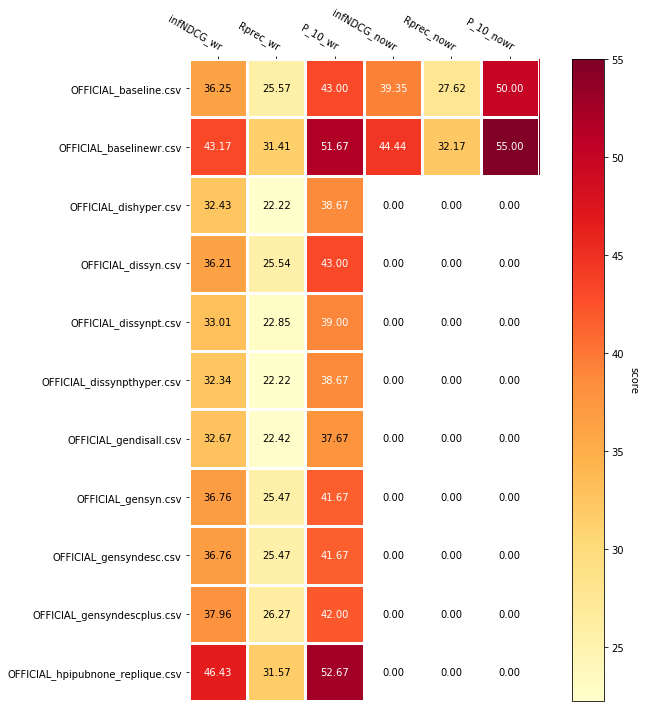

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
im, cbar = heatmapDf(alldata*100, ax=ax,
                   cmap="YlOrRd", cbarlabel="score")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
plt.show()

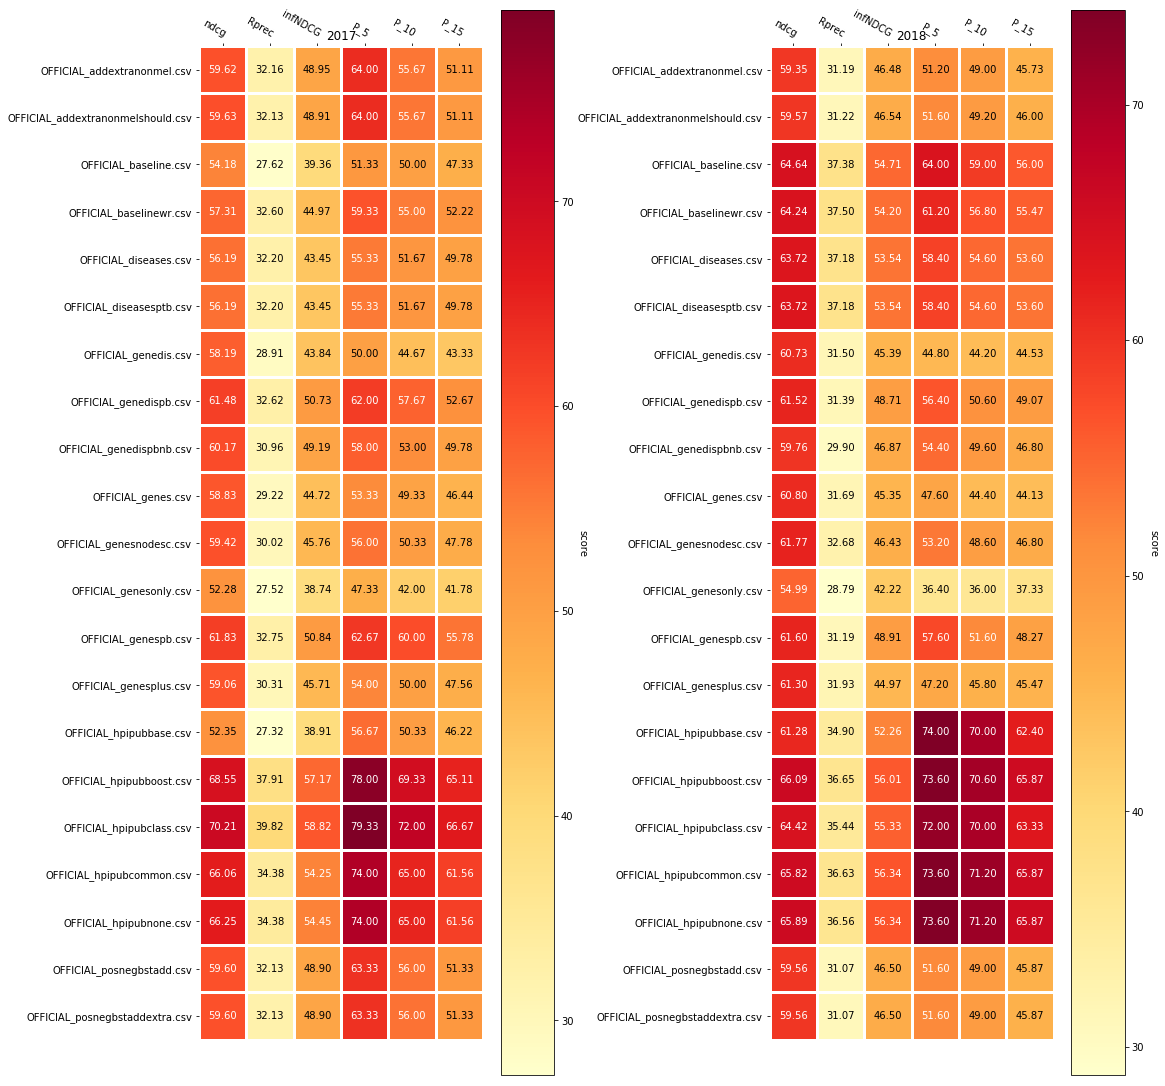

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,20))

im, cbar = heatmapDf(data*100, ax=ax[0],
                   cmap="YlOrRd", cbarlabel="score")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
ax[0].set_title("2017")
im, cbar = heatmapDf(data2018*100, ax=ax[1],
                   cmap="YlOrRd", cbarlabel="score")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
ax[1].set_title("2018")

fig.tight_layout()
plt.show()

In [90]:
idx = pd.IndexSlice
readStats("stats").loc[idx[:,"all"],:]

,,infNDCG,Rprec,P_10
File,Topic,,,
OFFICIAL_baseline.csv,all,0.3935,0.2762,0.5000
OFFICIAL_baselinewr.csv,all,0.4444,0.3217,0.5500
OFFICIAL_dishyper.csv,all,0.3614,0.2508,0.4667
OFFICIAL_dissyn.csv,all,0.3976,0.2767,0.5033
OFFICIAL_dissynpt.csv,all,0.3448,0.2399,0.4133
OFFICIAL_dissynpthyper.csv,all,0.3404,0.2359,0.4067
OFFICIAL_gendisall.csv,all,0.2107,0.1412,0.2033
OFFICIAL_gensyn.csv,all,0.3739,0.2434,0.4600
OFFICIAL_gensyndesc.csv,all,0.2713,0.1886,0.2767
